In [23]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("dataset.csv")

In [14]:
# data Cleaning 
dataset.sample(4)

,age,sex,drug,reaction,hospitalized
4561,75.0,2.0,LETAIRIS,Unevaluable event,0
1235,NaN,2.0,LYRICA,Suicidal ideation,0
3911,NaN,2.0,MIRENA,Genital haemorrhage,0
3751,6.0,2.0,TRACLEER,Dyspnoea,0


In [7]:
dataset.isnull().sum()

age             3350
sex               74
drug               0
reaction           0
hospitalized       0
dtype: int64

In [9]:
df = dataset.dropna()

In [17]:
# data exploratioon 
print(df.info())
print(df.describe())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 6635 entries, 0 to 9997
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           6635 non-null   float64
 1   sex           6635 non-null   float64
 2   drug          6635 non-null   object 
 3   reaction      6635 non-null   object 
 4   hospitalized  6635 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 311.0+ KB
None
                age          sex  hospitalized
count   6635.000000  6635.000000   6635.000000
mean      63.935494     1.632253      0.226526
std      363.960313     0.500933      0.420053
min        0.000000     0.000000      0.000000
25%       47.000000     1.000000      0.000000
50%       61.000000     2.000000      0.000000
75%       72.000000     2.000000      0.000000
max    22240.000000     2.000000      2.000000
    age  sex           drug                   reaction  hospitalized
0  26.0  1.0  DURAGESIC-100  DRUG ADM

In [18]:
df.dtypes

age             float64
sex             float64
drug             object
reaction         object
hospitalized      int64
dtype: object

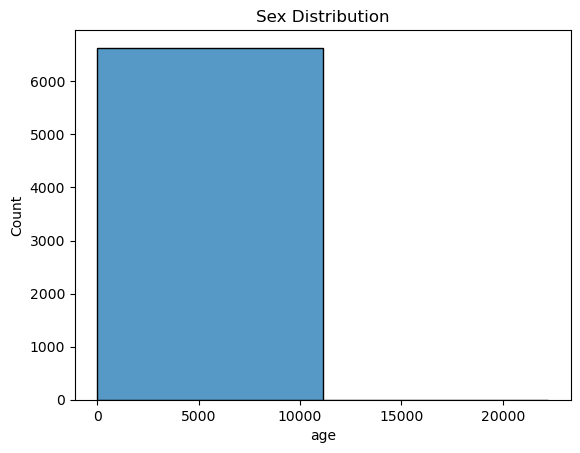

In [26]:
#univaritate analysis 
sns.histplot(df['age'],bins=2)
plt.title('Sex Distribution')
plt.show()

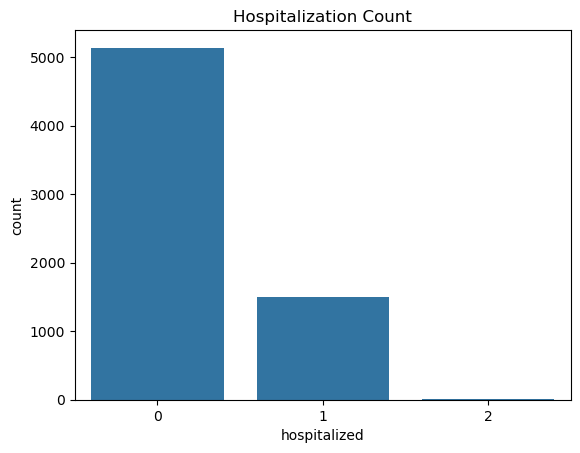

In [28]:
sns.countplot(x='hospitalized', data=df)
plt.title('Hospitalization Count')
plt.show()


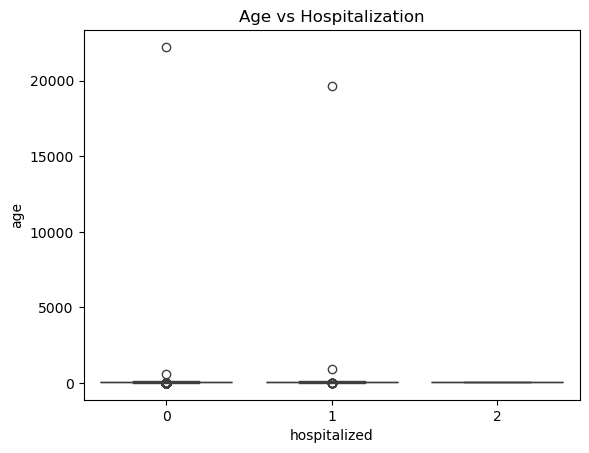

In [31]:
# Bivariate Analysis
sns.boxplot(x='hospitalized', y='age', data=df)
plt.title('Age vs Hospitalization')
plt.show()



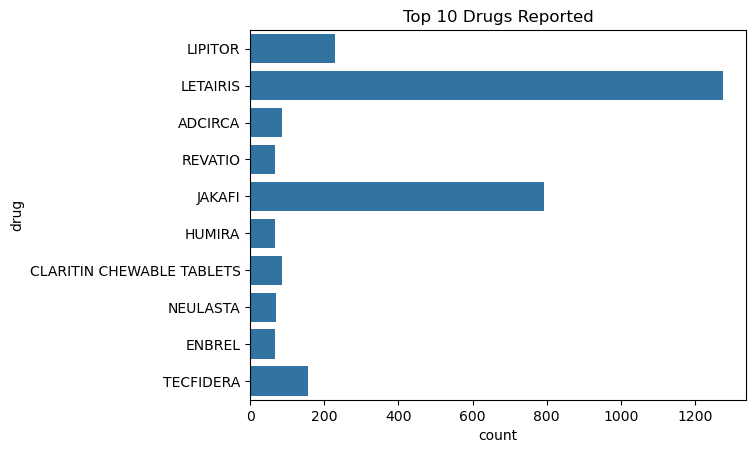

In [32]:
top_drugs = df['drug'].value_counts().nlargest(10).index
sns.countplot(data=df[df['drug'].isin(top_drugs)], y='drug')
plt.title('Top 10 Drugs Reported')
plt.show()


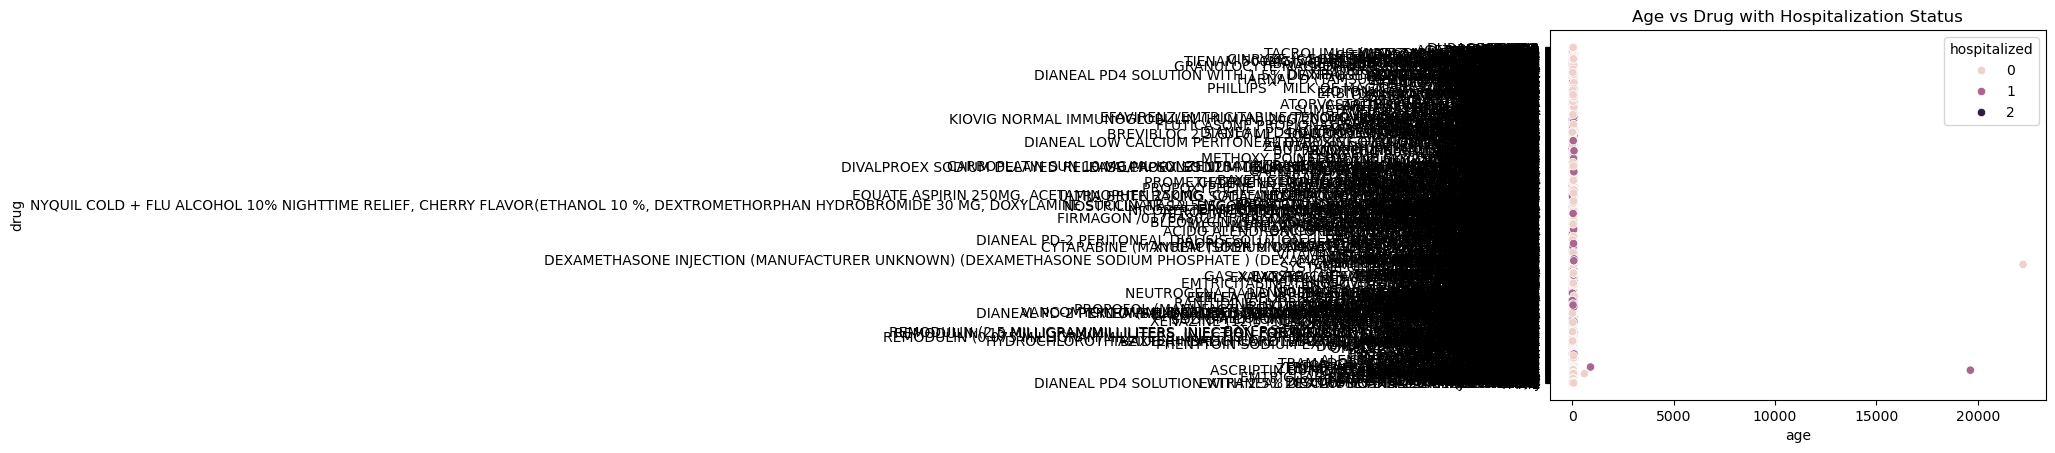

In [35]:
# multivariate analysis
sns.scatterplot(data=df, x='age', y='drug', hue='hospitalized')
plt.title('Age vs Drug with Hospitalization Status')
plt.show()


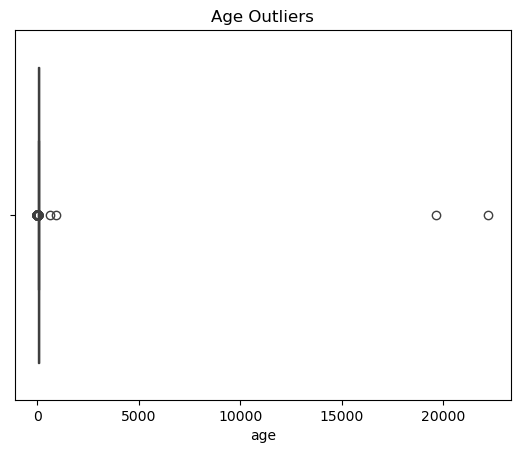

In [37]:
sns.boxplot(x=df['age'])
plt.title('Age Outliers')
plt.show()


In [40]:
df.head()

,age,sex,drug,reaction,hospitalized
0,26.0,1.0,DURAGESIC-100,DRUG ADMINISTRATION ERROR,0
1,77.0,2.0,BONIVA,Vomiting,0
5,48.0,2.0,LIPITOR,Drug hypersensitivity,0
6,68.0,2.0,LETAIRIS,Cough,0
7,65.0,2.0,LETAIRIS,Rhinorrhoea,0


In [43]:
df1 = df.drop_duplicates()


In [44]:
df1

,age,sex,drug,reaction,hospitalized
0,26.0,1.0,DURAGESIC-100,DRUG ADMINISTRATION ERROR,0
1,77.0,2.0,BONIVA,Vomiting,0
5,48.0,2.0,LIPITOR,Drug hypersensitivity,0
6,68.0,2.0,LETAIRIS,Cough,0
7,65.0,2.0,LETAIRIS,Rhinorrhoea,0
...,...,...,...,...,...
9989,73.0,2.0,GABAPENTIN,Drug ineffective,0
9991,46.0,2.0,EFFEXOR XR,Heart rate increased,0
9995,50.0,1.0,LYRICA,Back pain,0
9996,56.0,2.0,LYRICA,Weight increased,0


In [45]:
# feature engineeringg 

In [46]:
df1['is_elderly'] = df1['age']  > 60

/tmp/ipykernel_103870/2535945782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['is_elderly'] = df1['age']  > 60


In [47]:
df1

,age,sex,drug,reaction,hospitalized,is_elderly
0,26.0,1.0,DURAGESIC-100,DRUG ADMINISTRATION ERROR,0,False
1,77.0,2.0,BONIVA,Vomiting,0,True
5,48.0,2.0,LIPITOR,Drug hypersensitivity,0,False
6,68.0,2.0,LETAIRIS,Cough,0,True
7,65.0,2.0,LETAIRIS,Rhinorrhoea,0,True
...,...,...,...,...,...,...
9989,73.0,2.0,GABAPENTIN,Drug ineffective,0,True
9991,46.0,2.0,EFFEXOR XR,Heart rate increased,0,False
9995,50.0,1.0,LYRICA,Back pain,0,False
9996,56.0,2.0,LYRICA,Weight increased,0,False


In [60]:
df2 = df1.copy()

In [ ]:
df2 = pd.get_dummies(df2, columns=['drug', 'reaction'], drop_first=True)


In [67]:
df2

,age,sex,hospitalized,is_elderly,drug_(METHOTREXATE),drug_5-ASA,drug_5-FLUOROURACIL,drug_ABACAVIR,drug_ABATACEPT,drug_ABATACEPT SUBQ INJECTION 125MG/ML,...,reaction_White blood cell count decreased,reaction_White blood cell count increased,reaction_Wound,reaction_Wound haemorrhage,reaction_Wound infection,reaction_Wrist fracture,reaction_Wrong technique in drug usage process,reaction_Wrong technique in product usage process,reaction_Yawning,reaction_Yellow skin
0,26.0,1.0,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,77.0,2.0,0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,48.0,2.0,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,68.0,2.0,0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,65.0,2.0,0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,73.0,2.0,0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9991,46.0,2.0,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9995,50.0,1.0,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9996,56.0,2.0,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [68]:
df2.to_csv('cleaned_data.csv',index=False)